In [1]:
import numpy as np
import xarray as xr
import dask
from matplotlib import pyplot as plt
import matplotlib.colors
%matplotlib inline
from xmitgcm import open_mdsdataset

In [2]:
plt.rcParams.update({'font.size': 14
    , 'legend.markerscale': 1., 'axes.titlesize': 16, 'axes.labelsize' : 14,
      'legend.fontsize' : 14,'legend.handlelength': 3})

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

In [3]:
data_dir = '/swot/SUM01/tongya/cox/fine/run_quik_ex2/'
winddir = data_dir + 'taux_ex2.bin'
ws = np.fromfile(winddir, dtype='>f8')
ws = np.reshape(ws, (600, 1440))
ws = ws[:, 100]

ttdir = data_dir + 'surtemp_ex2.bin'
tt = np.fromfile(ttdir, dtype='>f8')
tt = np.reshape(tt, (600, 1440))
tt = tt[:, 100]

In [4]:
data_dir = '/swot/SUM01/tongya/cox/fine/run_quik_ex2/'

ds = open_mdsdataset(data_dir,prefix={'etan_ave','xyMom_ave','theta_ave'}).chunk()

lon = ds.XC
lat = ds.YC
lev = ds.Z

ssh = ds['ETAN'][50:100, :, :]
ssh = ssh.mean('time')
ssh = ssh.where(ssh != 0)

uu = ds['UVEL'][50:100, :20, :,150]
uu = uu.mean(dim='time')
uu = uu.where(uu != 0)

temp = ds['THETA'][50:100, :20, :, 150]
temp = temp.mean(dim='time')
temp = temp.where(temp > 0)

levs1 = np.arange(-0.6, 0.6+0.01, 0.02)
levs2 = np.arange(-1.0, 1.0+0.01, 0.1)

/home/tls2913/.conda/envs/geo_scipy/lib/python3.6/site-packages/xmitgcm/utils.py:336: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


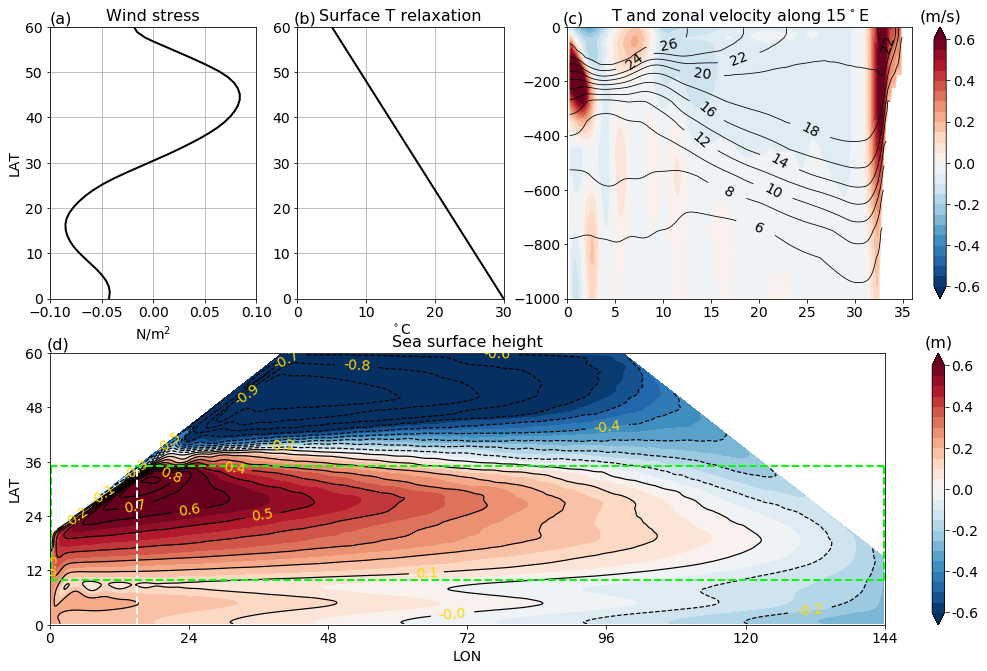

In [5]:
fig = plt.figure(figsize=(17, 11))

hx1 = plt.subplot(2, 4, 1)
plt.plot(ws, lat, 'k', linewidth=2)
plt.ylim(0, 60)
plt.xlim(-0.1, 0.1)
plt.ylabel('LAT')
plt.xlabel('N/m$^2$')
plt.grid()
plt.title('Wind stress')
plt.text(-0.1, 60.8, '(a)', size=16)

plt.subplot(2, 4, 2)
plt.plot(tt, lat, 'k', linewidth=2)
plt.xlabel('$^\circ$C')
plt.ylim(0, 60)
plt.xlim(0, 30)
#plt.ylabel('LAT')
plt.grid()
#plt.yticks(ticks=np.arange(0,61,10), labels='')
plt.title('Surface T relaxation')
plt.text(-0.5, 60.8, '(b)', size=16)

plt.subplot(2, 2, 2)
levs1 = np.arange(-0.6, 0.61, 0.05)
levs2 = np.arange(4, 28+0.1, 2)
h1 = plt.contourf(lat, lev[:20], uu, levs1, cmap='RdBu_r', extend='both', vmin=-0.6, vmax=0.6)
    
c_ticks = np.arange(-0.6, 0.61, 0.2)
h2 = plt.colorbar(h1, ticks=c_ticks, format='%2.1f')
h2.ax.set_title('(m/s)')
#h2.ax.tick_params(labelsize=16)
    
h2 = plt.contour(lat, lev[:20], temp[:20,:], levs2, colors ='k', linewidths=0.8)
plt.clabel(h2, fmt='%2.0f')
    
y_ticks = np.arange(-1000, 1, 200)
x_ticks = np.arange(0, 41, 12)
plt.ylim(-1000, 0)
plt.xlim(0, 36)
plt.title('T and zonal velocity along 15$^\circ$E')
plt.text(-0.5, 12, '(c)', size=16)
#plt.ylabel('Depth (m)')

plt.subplot(2, 1, 2)
levs1 = np.arange(-0.6, 0.6+0.01, 0.05)
levs2 = np.arange(-1.0, 1.0+0.01, 0.1)

h1 = plt.contourf(lon, lat, ssh, levs1, cmap='RdBu_r', extend='both', vmin=-0.6, vmax=0.6)

c_ticks = np.arange(-0.6, 0.6+0.2, 0.2)
h2 = plt.colorbar(h1, ticks=c_ticks, format='%2.1f', fraction=.07)
h2.ax.set_title('(m)')

h2 = plt.contour(lon, lat, ssh, levs2, colors ='k', linewidths=1.2)
plt.clabel(h2, fmt='%2.1f', colors='gold')

plt.plot([15, 15], [0, 36], color='w', linestyle='--', linewidth=2)
plt.plot([0.1, 0.1], [10, 35], color='lime', linestyle='--', linewidth=2)
plt.plot([0, 144], [10, 10], color='lime', linestyle='--', linewidth=2)
plt.plot([0, 144], [35, 35], color='lime', linestyle='--', linewidth=2)
plt.plot([143.9, 143.9], [10, 35], color='lime', linestyle='--', linewidth=2)

x_ticks = np.arange(0, 145, 24)
y_ticks = np.arange(0, 61, 12)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.xlim(0, 144)
plt.ylim(0, 60)
plt.xlabel('LON')
plt.ylabel('LAT')
plt.title('Sea surface height')
plt.text(-0.5, 60.8, '(d)', size=16)

#plt.tight_layout(pad=1.0, w_pad=0.1, h_pad=1.0)

plt.savefig('Figure_01.png', dpi=300, bbox_inches='tight')